In [ ]:
mydir = r''

In [ ]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
#!/bin/bash
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:41<00:00, 25.7MB/s]
100% 1.06G/1.06G [00:41<00:00, 27.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
catagories = ['cats', 'dogs']

In [ ]:
Data = []
for i in catagories:
    folder_path = os.path.join(mydir, i)
    if i == 'cats':
        label = 0
    else:
        label = 1

    for j in os.listdir(folder_path):
        img_path = os.path.join(folder_path, j)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (150, 150))
        data.append([img, label])

FileNotFoundError: [Errno 2] No such file or directory: 'cats'

In [ ]:
random.shuffle(data)

In [ ]:
X = []
y = []
for i in data:
    X.append(i[0])
    y.append(i[1])

In [ ]:
y=np.array(y)
X=np.array(X)

In [ ]:
X.shape

(0,)

In [ ]:
x=X/255

In [ ]:
# Create CNN
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X,y, epochs=5, validation_split=0.1)

ValueError: Training data contains 0 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.1`. Either provide more data, or a different value for the `validation_split` argument.

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


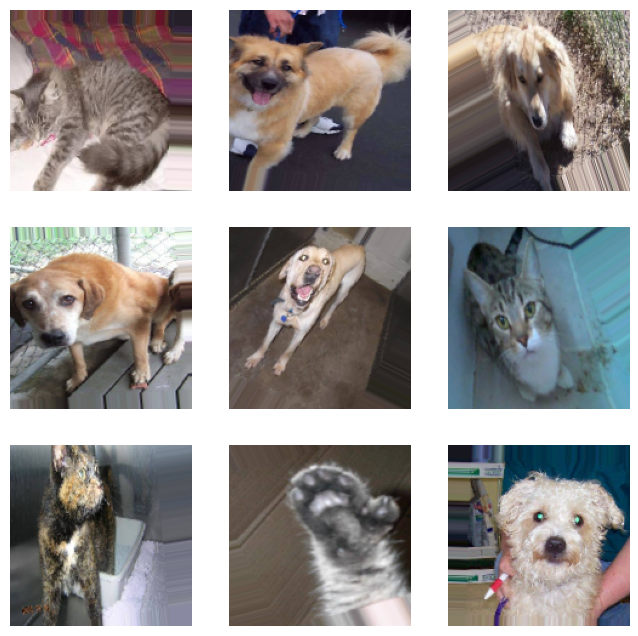

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = "/content/train"
test_dir = "/content/test"

# Data Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,         # Normalize pixel values
    rotation_range=30,       # Rotate images randomly by 30 degrees
    width_shift_range=0.2,   # Shift width by 20%
    height_shift_range=0.2,  # Shift height by 20%
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Zoom up to 20%
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest'      # Fill missing pixels
)

# No augmentation for test data (only rescale)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='binary'      # Since it's a binary classification problem
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Example: Get a batch of images
images, labels = next(train_generator)

# Display some augmented images
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i in range(9):
    ax = axes[i // 3, i % 3]
    ax.imshow(images[i])
    ax.axis("off")
plt.show()


In [ ]:
# Create CNN
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=2000,
    epochs=25,
    validation_data=test_generator,
    validation_steps=800
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
 131/2000 ━━━━━━━━━━━━━━━━━━━━ 37:31 1s/step - accuracy: 0.5056 - loss: 0.6922